In [2]:
from shapely.geometry import Point
import geopandas

In [3]:
s = geopandas.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)])
s

0    POINT (1.00000 1.00000)
1    POINT (2.00000 2.00000)
2    POINT (3.00000 3.00000)
dtype: geometry

In [4]:
s = geopandas.GeoSeries(
    [Point(1, 1), Point(2, 2), Point(3, 3)], crs="EPSG:3857"
)
s.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
from shapely.geometry import Polygon, LineString, Point
s = geopandas.GeoSeries(
    [
        Polygon([(0, 0), (1, 1), (0, 1)]),
        Polygon([(10, 0), (10, 5), (0, 0)]),
        Polygon([(0, 0), (2, 2), (2, 0)]),
        LineString([(0, 0), (1, 1), (0, 1)]),
        Point(0, 1)
    ]
)
s

0    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0....
1    POLYGON ((10.00000 0.00000, 10.00000 5.00000, ...
2    POLYGON ((0.00000 0.00000, 2.00000 2.00000, 2....
3    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
4                              POINT (0.00000 1.00000)
dtype: geometry

In [6]:
s.area

0     0.5
1    25.0
2     2.0
3     0.0
4     0.0
dtype: float64

In [7]:
from shapely.geometry import Polygon, LineString, Point
s = geopandas.GeoSeries(
    [
        Polygon([(0, 0), (1, 1), (0, 1)]),
        LineString([(0, 0), (1, 1), (1, 0)]),
        Point(0, 0),
    ]
)
s

0    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0....
1    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
2                              POINT (0.00000 0.00000)
dtype: geometry

In [8]:
s.boundary

0    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
1    MULTIPOINT ((0.00000 0.00000), (1.00000 0.00000))
2                             GEOMETRYCOLLECTION EMPTY
dtype: geometry

In [9]:
from shapely.geometry import Point, Polygon, LineString
d = {'geometry': [Point(2, 1), Polygon([(0, 0), (1, 1), (1, 0)]),
LineString([(0, 1), (1, 2)])]}
gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
gdf.bounds

,minx,miny,maxx,maxy
0,2.0,1.0,2.0,1.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,2.0


In [10]:
from shapely.geometry import Point, Polygon, LineString
d = {'geometry': [Point(2, 1), Polygon([(0, 0), (1, 1), (1, 0)]),
LineString([(0, 0), (1, 1)])]}
gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
gdf.geom_type


0         Point
1       Polygon
2    LineString
dtype: object

In [11]:
from shapely.geometry import Point
s = geopandas.GeoSeries(
    [
        Point(0, 1),
        Point(0, 1, 2),
    ]
)
s


0              POINT (0.00000 1.00000)
1    POINT Z (0.00000 1.00000 2.00000)
dtype: geometry

In [12]:
s.has_z

0    False
1     True
dtype: bool

c:\Users\Hasem\miniconda3\envs\geogee\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


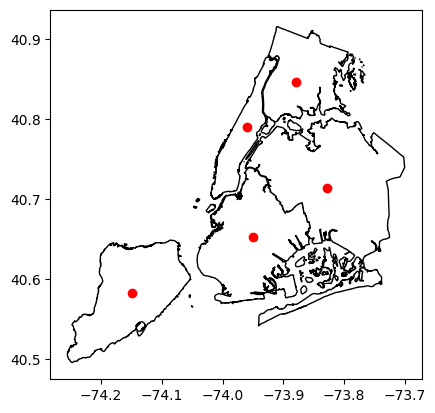

In [13]:
import geodatasets

boros = geopandas.read_file(geodatasets.get_path("nybb"))
boros.BoroName

boro_locations = geopandas.tools.geocode(boros.BoroName)
boro_locations

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
boros.to_crs("EPSG:4326").plot(ax=ax, color="white", edgecolor="black");
boro_locations.plot(ax=ax, color="red");

In [14]:
import geopandas.tools


kandra = geopandas.tools.geocode("Kandra, West Bengal")
kandra

,geometry,address
0,POINT (87.97191 23.73291),"Kandra, 713129, West Bengal, India"


In [15]:
import geopandas
import geodatasets

In [16]:
nybb = geopandas.read_file(geodatasets.get_path("nybb"))
# simplify geometry to save space when rendering many interactive maps
nybb.geometry = nybb.simplify(200)

In [17]:
n200_sampled_points = nybb.sample_points(200)
m = nybb.explore()
n200_sampled_points.explore(m=m, color='red')

In [18]:
import geopandas
import rasterio.warp
from shapely.geometry import shape

# load example data
world = geopandas.read_file("https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip")
# Reproject to Mercator (after dropping Antartica)
world = world.drop(7)
destination_crs = "EPSG:3395"
geometry = rasterio.warp.transform_geom(
    src_crs=world.crs,
    dst_crs=destination_crs,
    geom=world.geometry.values,
)
mercator_world = world.set_geometry(
    [shape(geom) for geom in geometry],
    crs=destination_crs,
)